In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
import numpy as np

In [3]:
image_data = Path("../input/cell_images/cell_images")

In [4]:
image_data.ls()

[PosixPath('../input/cell_images/cell_images/Uninfected'),
 PosixPath('../input/cell_images/cell_images/Parasitized')]

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(image_data, train='.', valid_pct=0.2, 
                                  ds_tfms=get_transforms(flip_vert=True, max_warp=0),size=128, bs=64,
                                  num_workers=0).normalize(imagenet_stats)

In [6]:
data.classes, data.c

(['Parasitized', 'Uninfected'], 2)

In [7]:
data.train_ds[0][0].shape

torch.Size([3, 128, 128])

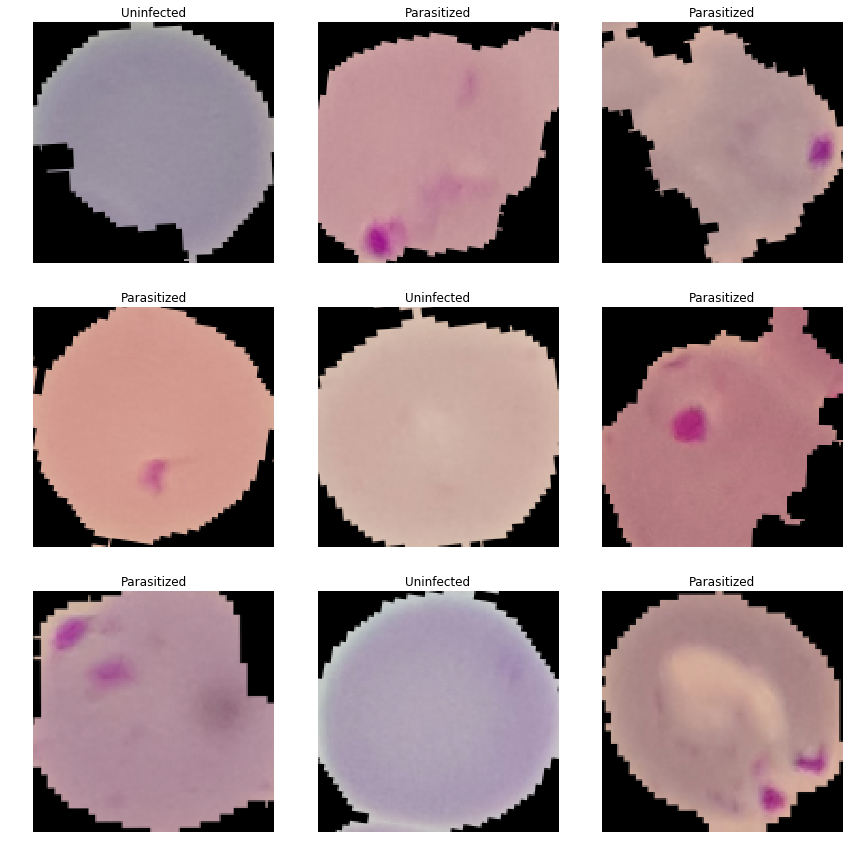

In [8]:
data.show_batch(rows=3)

In [9]:
learn = cnn_learner(data, models.densenet161, metrics=accuracy, path='./')

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.torch/models/densenet161-8d451a50.pth
115730790it [00:04, 28578224.42it/s]


In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


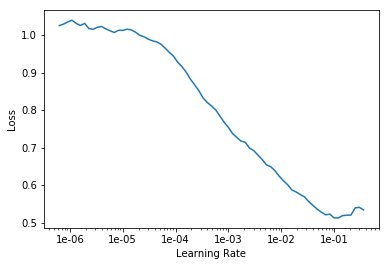

In [11]:
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(6, max_lr=slice(1e-04,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.194577,0.139414,0.947378,04:10
1,0.146903,0.114194,0.961531,03:09
2,0.128530,0.090439,0.969153,03:07
3,0.108885,0.085984,0.968971,03:04
4,0.099759,0.082846,0.971874,03:04
5,0.095987,0.081908,0.971874,03:05


In [13]:
learn.save("stage-1")

In [14]:
learn.unfreeze()

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


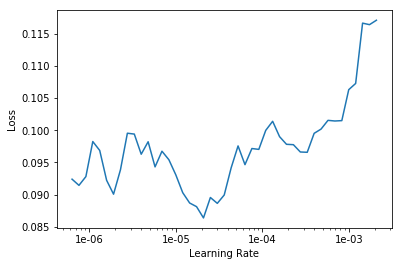

In [16]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(6, max_lr=slice(1e-06,1e-05))

epoch,train_loss,valid_loss,accuracy,time
0,0.096064,0.081432,0.971693,03:36
1,0.097082,0.082710,0.970786,03:32
2,0.098236,0.080332,0.972782,03:32
3,0.081728,0.079409,0.973870,03:31
4,0.088769,0.079797,0.972963,03:31
5,0.098496,0.079862,0.972237,03:30


In [18]:
learn.save("stage-2")

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

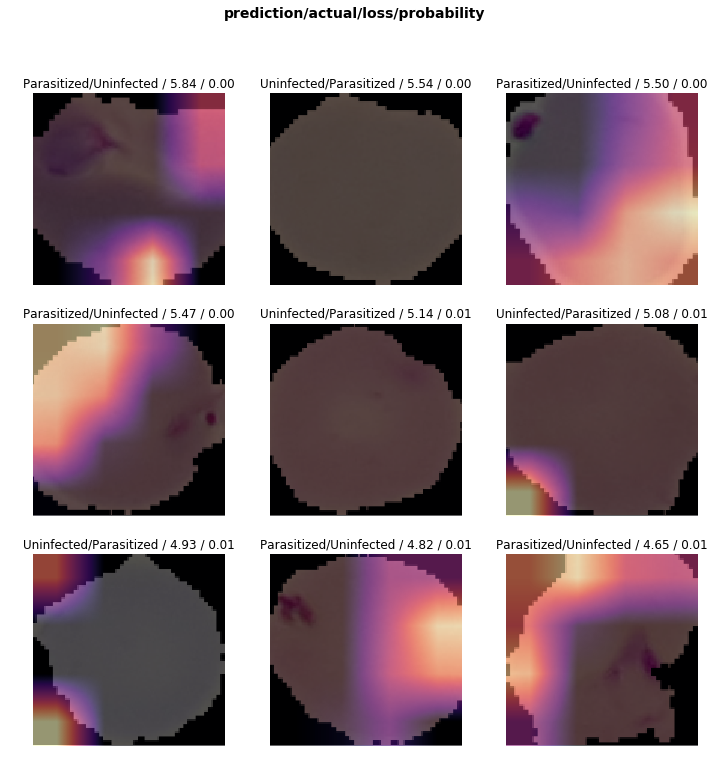

In [20]:
interp.plot_top_losses(9, figsize=(12,12))

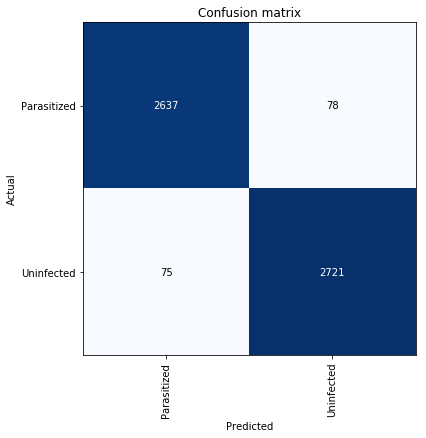

In [21]:
interp.plot_confusion_matrix(figsize=(6,6))